# BASELINE NOTEBOOK 

## Metrics

the following metrics will be used for the model:

`auc`= Approximates the AUC (Area under the curve) of the ROC or PR curves. (ROC / PR)

`Precision` 

`Recall `

`F1`

## general `Baseline` for data train

In [59]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import imageio
import geopandas as gpd
from IPython.display import Image, display
import tensorflow as tf
from tensorflow.keras import layers, callbacks, backend, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score, roc_auc_score, f1_score, precision_score
import pickle
from PIL import Image


## GET DATA

In [11]:
df=pd.read_csv("./methane_224_data/smallsize224_all.csv")
df=df.dropna()
root = 'methane_224_data/smallsize224/'
abc = 'F:\\\\CNOOC_testing\\\\Methane_dataset\\\\METHANE_PROJECT\\\\smallsize224\\\\train_images_1\\train_images_1\\43.94827109_-93.6494963\\naip.png'

In [12]:
df = df.dropna()

In [13]:
df.head(2)

,Unnamed: 0,Latitude,Longitude,Type,Source,Image_Folder,geometry,dataset,Image_Folder_long_lat,img_dir
0,0,43.948271,-93.649496,CAFOs,MinnesotaPollutionControlAgency,train_images/43.94827109_-93.6494963,POLYGON ((-93.64626236497716 43.95060750304138...,train,43.94827109_-93.6494963,F:\\CNOOC_testing\\Methane_dataset\\METHANE_PR...
1,1,43.004434,-78.208900,Negative,Aeroplanes,train_images/43.00443446102501_-78.20890003579709,POLYGON ((-78.20566610077425 43.00680791855935...,train,43.00443446102501_-78.20890003579709,F:\\CNOOC_testing\\Methane_dataset\\METHANE_PR...


In [14]:
df.Type = df.Type.astype(str)

In [15]:
df['new_path'] = df.img_dir.apply(lambda x: x.replace('F:\\\\CNOOC_testing\\\\Methane_dataset\\\\METHANE_PROJECT\\\\smallsize224\\\\', root)\
    .replace('F:\\\\CNOOC_testing\\\\Methane_dataset\\\\METHANE_PROJECT\\\\smallsize224_val\\\\', root)\
    .replace('F:\\\\CNOOC_testing\\\\Methane_dataset\\\\METHANE_PROJECT\\\\smallsize224_test\\\\', root)\
    .replace("\\\\", "/"))
#    .replace('F:\\\\CNOOC_testing\\\\Methane_dataset\\\\METHANE_PROJECT\\\\smallsize224_val\\\\val_images\\\\val_images\\', root).replace("\\", "/").replace("//","/"))
df['new_path'] = df.new_path.apply(lambda x: x.replace("\\","/"))
df.new_path.to_list()[-1],df.img_dir.to_list()[-1]
df.Type = df.Type.astype(str)
df_train=df.loc[df['dataset'] == "train"]
df_test=df.loc[df['dataset'] == "val"]

In [16]:
df_train = df_train[(df_train.Type == 'Negative') | (df_train.Type == 'CAFOs') | (df_train.Type == 'WWTreatment')
           | (df_train.Type == 'Landfills') | (df_train.Type == 'RefineriesAndTerminals')
           | (df_train.Type == 'ProcessingPlants') | (df_train.Type == 'Mines')]

In [17]:
df_test = df_test[(df_test.Type == 'Negative') | (df_test.Type == 'CAFOs') | (df_test.Type == 'WWTreatment')
           | (df_test.Type == 'Landfills') | (df_test.Type == 'RefineriesAndTerminals')
           | (df_test.Type == 'ProcessingPlants') | (df_test.Type == 'Mines')]

In [18]:
# shuffle the dataframes in place
#df_train = df_train.sample(frac=1).reset_index(drop=True)
#df_test = df_test.sample(frac=1).reset_index(drop=True)

In [19]:
df_train.head()

,Unnamed: 0,Latitude,Longitude,Type,Source,Image_Folder,geometry,dataset,Image_Folder_long_lat,img_dir,new_path
0,0,43.948271,-93.649496,CAFOs,MinnesotaPollutionControlAgency,train_images/43.94827109_-93.6494963,POLYGON ((-93.64626236497716 43.95060750304138...,train,43.94827109_-93.6494963,F:\\CNOOC_testing\\Methane_dataset\\METHANE_PR...,methane_224_data/smallsize224/train_images_1/t...
1,1,43.004434,-78.208900,Negative,Aeroplanes,train_images/43.00443446102501_-78.20890003579709,POLYGON ((-78.20566610077425 43.00680791855935...,train,43.00443446102501_-78.20890003579709,F:\\CNOOC_testing\\Methane_dataset\\METHANE_PR...,methane_224_data/smallsize224/train_images_3/t...
2,2,38.616000,-77.270000,WWTreatment,HydroWASTE,train_images/38.616_-77.27,POLYGON ((-77.26676606497716 38.61853717422367...,train,38.616_-77.27,F:\\CNOOC_testing\\Methane_dataset\\METHANE_PR...,methane_224_data/smallsize224/train_images_2/t...
3,3,44.672960,-95.153570,CAFOs,MinnesotaPollutionControlAgency,train_images/44.67296_-95.15357,POLYGON ((-95.15033606497715 44.67526754438732...,train,44.67296_-95.15357,F:\\CNOOC_testing\\Methane_dataset\\METHANE_PR...,methane_224_data/smallsize224/train_images_2/t...
4,4,43.923000,-111.611000,WWTreatment,HydroWASTE,train_images/43.923_-111.611,POLYGON ((-111.60776606497717 43.9253374131065...,train,43.923_-111.611,F:\\CNOOC_testing\\Methane_dataset\\METHANE_PR...,methane_224_data/smallsize224/train_images_1/t...


In [20]:
df_test.shape

(505, 11)

In [21]:
df_train.Type.value_counts()

Negative                  34195
CAFOs                     24934
WWTreatment               14296
Landfills                  3915
RefineriesAndTerminals     3817
ProcessingPlants           1830
Mines                      1706
Name: Type, dtype: int64

In [22]:
#def sampling_k_elements(group, k=1600):
#    if len(group) < k:
#        return group
#    return group.sample(k)
#balanced = df_train.groupby('Type').apply(sampling_k_elements).reset_index(drop=True)

In [23]:
SEED = 42
CATEGORIES = 6
TRAIN_BATCH_SIZE = 64
VAL_SPLIT = 0.2

IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNEL = 3

In [24]:
val_data, train_data = np.split(df_train, [int(VAL_SPLIT*len(df_train))])

In [25]:
class MyDataFrameIterator(image.DataFrameIterator):
    
    def __getitem__(self, idx):
        X_, y_ = super().__getitem__(idx)
        y_ = np.delete(y_, self.class_indices['Negative'], axis=1)
        return X_, y_
    
    def next(self):
        X_, y_ = super().next()
        y_ = np.delete(y_, self.class_indices['Negative'], axis=1)
        return X_, y_
    
class MyImageDataGenerator(image.ImageDataGenerator):
    
    def flow_from_dataframe(self, df, directory, *args, **kwargs):
        return MyDataFrameIterator(df, directory, *args, **kwargs)

In [26]:
datagen=MyImageDataGenerator(rescale=1./255,
                             #validation_split = VAL_SPLIT, # do not use this one :)
                             #rotation_range=20,
                             #width_shift_range=0.2,
                             #height_shift_range=0.2,
                             #horizontal_flip=True
                            )

In [27]:
train_gen = datagen.flow_from_dataframe(
    train_data,
    "",
    x_col="new_path",
    y_col="Type",
    color_mode='rgb',
    seed = SEED,
    class_mode="categorical",
    validate_filenames=False,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=TRAIN_BATCH_SIZE)

Found 67755 non-validated image filenames belonging to 7 classes.


In [28]:
val_gen = datagen.flow_from_dataframe(
    val_data,
    "",
    x_col="new_path",
    y_col="Type",
    color_mode='rgb',
    seed = SEED,
    class_mode="categorical",
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    validate_filenames=False,
    batch_size=TRAIN_BATCH_SIZE)

Found 16938 non-validated image filenames belonging to 7 classes.


In [29]:
TEST_BATCH_SIZE = 500

test_gen = datagen.flow_from_dataframe(
    df_test,
    "",
    x_col = "new_path",
    y_col = "Type",
    color_mode = 'rgb',
    seed = SEED,
    class_mode = "categorical",
    validate_filenames=False,
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    batch_size=TEST_BATCH_SIZE)

Found 505 non-validated image filenames belonging to 7 classes.


In [30]:
assert train_gen.class_indices == test_gen.class_indices
assert train_gen.class_indices == val_gen.class_indices

In [31]:
STEP_SIZE_TRAIN = train_gen.n//train_gen.batch_size
STEP_SIZE_VALID = val_gen.n//val_gen.batch_size

## `Baseline` probabilty

In [48]:
x_test, y_test= train_gen.next()

In [49]:
class_counts = pd.Series(train_gen.classes).value_counts().sort_index()
class_labels = list(train_gen.class_indices.keys())

class_counts_df = pd.DataFrame({
    'class_label': class_labels,
    'count': class_counts.values
})
class_probabilities = class_counts_df['count'] / class_counts_df['count'].sum()
constant_probability = np.tile(class_probabilities.values, (len(y_test), 1))

In [50]:
class_labels = list(train_gen.class_indices.keys())
data = {'class_labels': class_labels, 'class_index': list(train_gen.class_indices.values())}
pd.DataFrame(data)

,class_labels,class_index
0,CAFOs,0
1,Landfills,1
2,Mines,2
3,Negative,3
4,ProcessingPlants,4
5,RefineriesAndTerminals,5
6,WWTreatment,6


In [51]:
constant_probability=np.delete(constant_probability, 3, axis=1)

### baseline metrics

In [64]:
y_true = y_test
y_pred_proba= constant_probability
cat_names= class_labels

In [62]:
# Instantiate metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
auc = tf.keras.metrics.AUC()
pr_auc = tf.keras.metrics.AUC(name='pr_auc', curve='PR')
accuracy = tf.keras.metrics.Accuracy()

In [69]:
# Binarize predictions
y_pred = np.argmax(y_pred_proba).astype(int)

In [70]:
prec_cat = {}
recall_cat = {}
auc_cat = {}
pr_auc_cat = {}
accuracy_cat = {}
overall_cat = {}

def calc_metric(y_test, y_pred, m_dict, m_fun, idx, name):
    m_dict[name] = m_fun(y_test[:][:,idx].reshape(TEST_BATCH_SIZE,1), y_pred[:][:,idx].reshape(TEST_BATCH_SIZE,1)).numpy()

dicts = [prec_cat, recall_cat, auc_cat, pr_auc_cat, accuracy_cat]
funcs = [precision, recall, auc, pr_auc, accuracy]

for idx, name in enumerate(cat_names):
    for m_dict, m_fun in zip(dicts, funcs):
        calc_metric(y_test, y_pred, m_dict, m_fun, idx, name)
    overall_cat[name] = np.mean([d[name] for d in dicts])


ValueError: cannot reshape array of size 64 into shape (512,1)

In [ ]:
metrics_df = pd.DataFrame({
    'Category': cat_names,
    'Precision': list(prec_cat.values()),
    'Recall': list(recall_cat.values()),
    'AUC': list(auc_cat.values()),
    'PR AUC': list(pr_auc_cat.values()),
    'Accuracy': list(accuracy_cat.values()),
    'Overall': list(overall_cat.values())
})

print(metrics_df)

## `Baseline` CNN

In [50]:
def build_model():
    
    LR = 0.01 # learning rate parameter for Adam
    
    # build network
    inp = layers.Input(shape=(224, 224, 3))
    cnn = layers.Conv2D(8, (3, 3), activation='relu')(inp)
    cnn2 = layers.MaxPooling2D((2, 2))(cnn)
    cnn3 = layers.Conv2D(16, (3, 3), activation='relu')(cnn2)
    cnn4 = layers.MaxPooling2D((2, 2))(cnn3)
    
    flatten = layers.Flatten()(cnn4)
    dense1 = layers.Dense(16, activation='relu')(flatten)
    out = layers.Dense(6, activation='sigmoid')(dense1)
    
    model = Model(inputs=inp, outputs=out)
    
    model.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=LR), metrics=[
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.AUC(name='pr_auc', curve='PR'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        'accuracy'
    ])
    return model

In [75]:
backend.clear_session()
model = build_model()
model.class_indices_ = train_gen.class_indices
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 46656)             0     

In [74]:
model.class_indices_

{'CAFOs': 0,
 'Landfills': 1,
 'Mines': 2,
 'Negative': 3,
 'ProcessingPlants': 4,
 'RefineriesAndTerminals': 5,
 'WWTreatment': 6}

In [56]:
# Remember to change the run number so that we do not overwrite the
# saved model

RUN_NUMBER = 2
MODEL_NAME = f'DV_Basemodel_v{RUN_NUMBER}.hdf5'

cb = [callbacks.EarlyStopping(patience=8),
      callbacks.ReduceLROnPlateau(patience=4),
      callbacks.ModelCheckpoint(MODEL_NAME,
                                monitor='loss',
                                verbose=1,
                                save_best_only=True)]

# check the first epochs, if the metrics go to zero
# restart the run with slightly different hyperparameter

epochs = 10
history = model.fit_generator(generator = train_gen,
                              steps_per_epoch = STEP_SIZE_TRAIN,
                              validation_data = val_gen,
                              validation_steps = STEP_SIZE_VALID,
                              epochs = epochs,
                              callbacks = cb)

/tmp/ipykernel_1237/2143759887.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = train_gen,


Epoch 1/10


2023-05-29 02:27:15.954396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 02:27:16.093146: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-29 02:27:16.093184: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-29 02:27:16.093203: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 51939 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-05-29 02:27:16.093216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f

1058/1058 [==============================] - ETA: 0s - loss: 0.8578 - auc: 0.7272 - pr_auc: 0.1818 - precision: 0.0888 - recall: 9.4197e-04 - accuracy: 0.6871

2023-05-29 02:30:05.222525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-29 02:30:05.346614: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-29 02:30:05.346669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-29 02:30:05.346697: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 51939 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2023-05-29 02:30:05.346714: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_f


Epoch 1: loss improved from inf to 0.85779, saving model to DV_Basemodel_v2.hdf5
1058/1058 [==============================] - 211s 196ms/step - loss: 0.8578 - auc: 0.7272 - pr_auc: 0.1818 - precision: 0.0888 - recall: 9.4197e-04 - accuracy: 0.6871 - val_loss: 0.2698 - val_auc: 0.7890 - val_pr_auc: 0.2626 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.6971 - lr: 0.0100
Epoch 2/10
1058/1058 [==============================] - ETA: 0s - loss: 0.2720 - auc: 0.7829 - pr_auc: 0.2559 - precision: 0.5714 - recall: 1.9828e-04 - accuracy: 0.6904
Epoch 2: loss improved from 0.85779 to 0.27202, saving model to DV_Basemodel_v2.hdf5
1058/1058 [==============================] - 229s 216ms/step - loss: 0.2720 - auc: 0.7829 - pr_auc: 0.2559 - precision: 0.5714 - recall: 1.9828e-04 - accuracy: 0.6904 - val_loss: 0.2701 - val_auc: 0.7885 - val_pr_auc: 0.2618 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_accuracy: 0.6966 - lr: 0.0100
Epoch 3/10
1058/1058 [=============

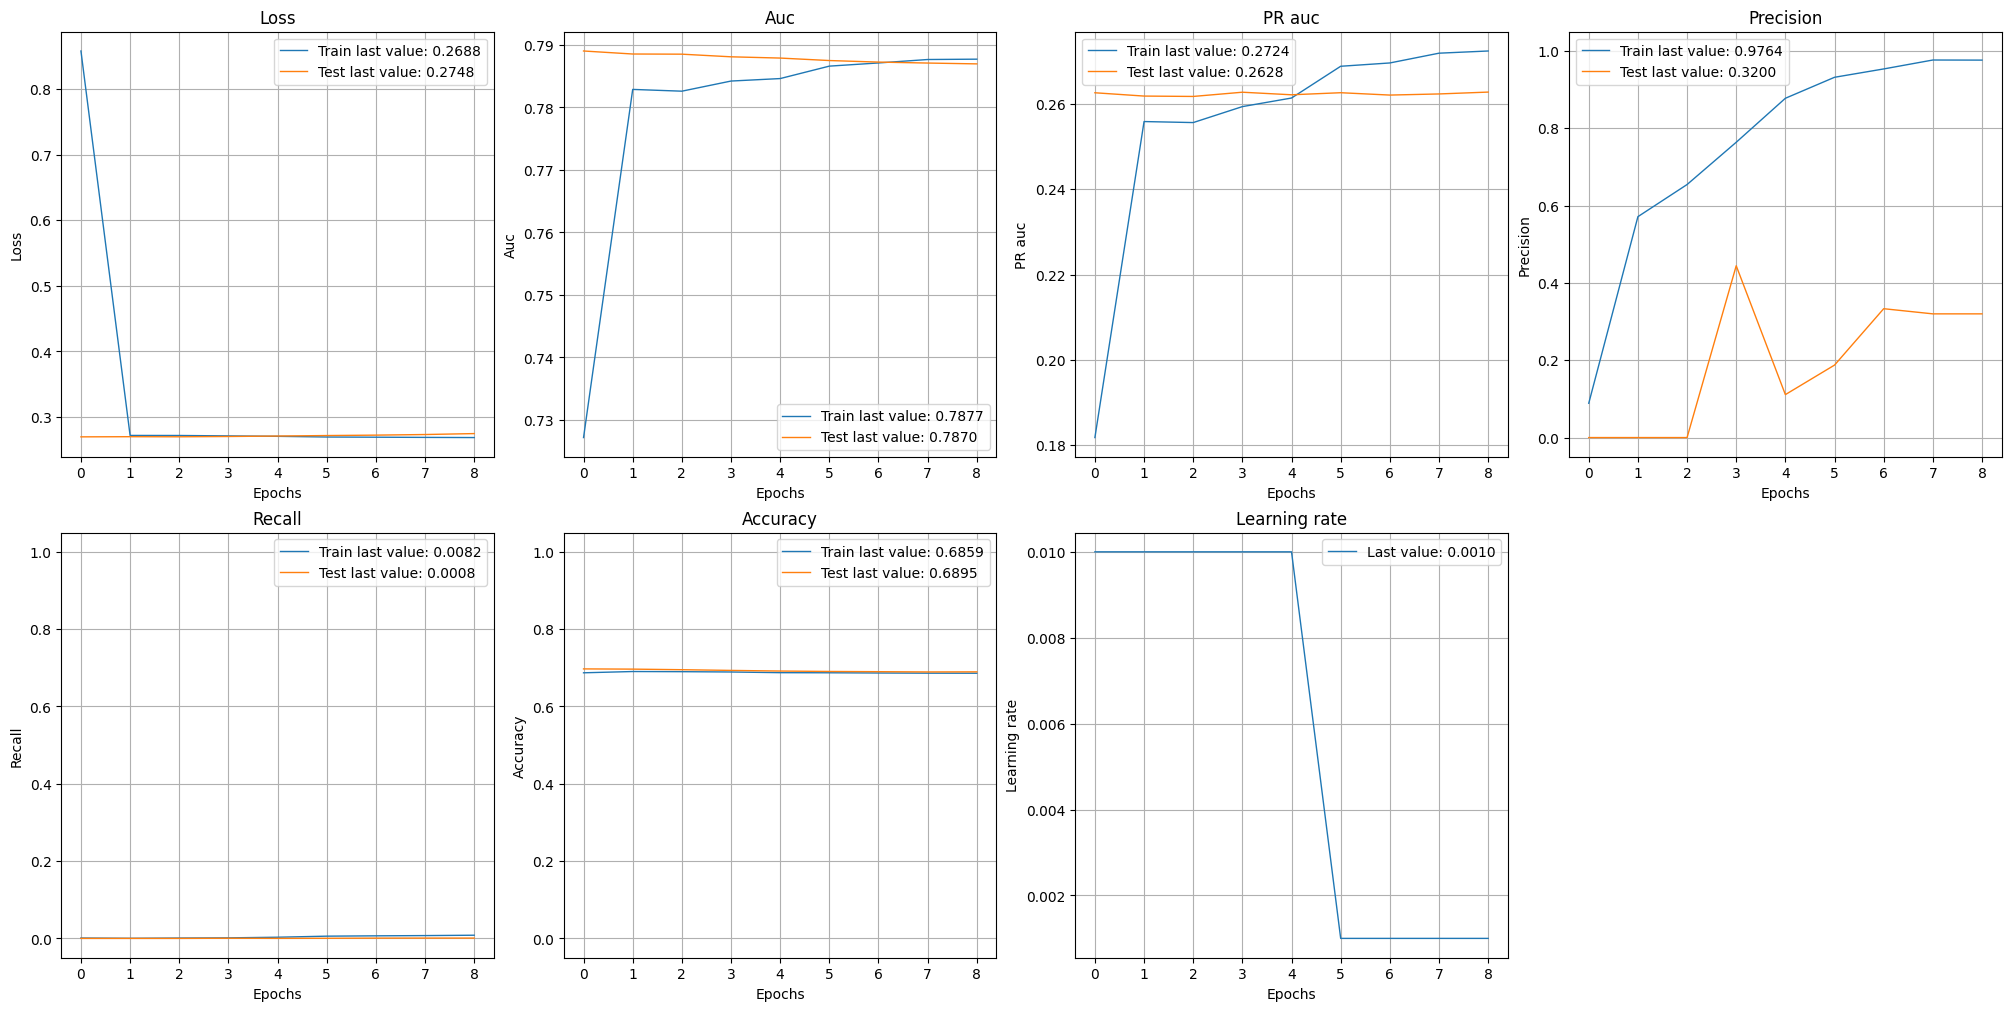

In [60]:
show_history(history)

In [64]:
model_name = "DVmodelBaseCNN.pkl"
with open(model_name, 'wb') as archivo:
    pickle.dump(model, archivo)

INFO:tensorflow:Assets written to: ram://4514fee5-a6a8-42d6-ae5f-74cf6b0532b5/assets


INFO:tensorflow:Assets written to: ram://4514fee5-a6a8-42d6-ae5f-74cf6b0532b5/assets


In [1]:
model_name = "DVmodelBaseCNN.pkl"
with open(model_name, 'rb') as archivo:
    modelCNN = pickle.load(archivo)

NameError: name 'pickle' is not defined

In [66]:
modelCNN

In [70]:
image_path = r'/root/code/dvictoria2/methane_source/train_images/24.59282019784276_-81.79682444440317/naip.png'

image = Image.open(image_path).convert('RGB')
image = image.resize((224, 224))
image_array = np.array(image)

x_pred = np.expand_dims(image_array, axis=0)
prediction = model.predict(x_pred)

1/1 [==============================] - 0s 52ms/step


2023-05-29 05:10:21.863869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [ ]:
show_history(history)
plot_history(history, path="standard.png")
plt.close()

In [95]:
categ_name= model.class_indices_
category_list = list(categ_name.items())
for item in category_list:
    if item[0] == 'Negative':
        category_list.remove(item)
categ_name = dict(category_list)

In [100]:
categ_name = model.class_indices_
category_list = list(categ_name.items())

for item in category_list:
    if item[0] == 'Negative':
        category_list.remove(item)
        break

new_categ_name = {}
new_index = 0
for index, category in enumerate(category_list):
    if category[0] != 'Negative':
        new_categ_name[new_index] = category[0]
        new_index += 1

In [101]:
new_categ_name

{0: 'CAFOs',
 1: 'Landfills',
 2: 'Mines',
 3: 'ProcessingPlants',
 4: 'RefineriesAndTerminals',
 5: 'WWTreatment'}

In [102]:
if np.count_nonzero(prediction) == 0:
    category = 'no methane source'
else:
    index = np.argmax(prediction)

    category = new_categ_name[index]

In [105]:
np.argmax(prediction)

1

# Evaluate Model

In [59]:
cat_names = list(test_gen.class_indices.keys())
cat_names.remove('Negative')
cat_names

['CAFOs',
 'Landfills',
 'Mines',
 'ProcessingPlants',
 'RefineriesAndTerminals',
 'WWTreatment']

In [71]:
X_test, y_test = test_gen.next()
y_pred_proba = model.predict(X_test)

FileNotFoundError: [Errno 2] No such file or directory: 'methane_224_data/smallsize224/test_images/38.787_-121.379/naip.png'

In [ ]:
# Use that if you want to save the arrays
#np.save(f'y_pred_proba_{RUN_NUMBER}.npy', y_pred_proba)
#np.save(f'y_test_{RUN_NUMBER}.npy', y_test)

## Plot the distribution of a few predictions

In [ ]:
plt.imshow(y_pred_proba[:20].T)
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(y_test[:20].T)
plt.colorbar()
plt.show()

In [ ]:
# Plot a sample image from the test set
abc = X_test[0,:,:,:].reshape(224, 224, 3).astype(np.uint8)
plt.imshow(abc)
plt.colorbar()
plt.show()

## Evaluate metrics

In [ ]:
# Instantiate metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
auc = tf.keras.metrics.AUC()
pr_auc = tf.keras.metrics.AUC(name='pr_auc', curve='PR')
accuracy = tf.keras.metrics.Accuracy()

In [ ]:
# Binarize predictions
y_pred = (y_pred_proba> 0.5).astype(int)

In [ ]:
prec_cat = {}
recall_cat = {}
auc_cat = {}
pr_auc_cat = {}
accuracy_cat = {}
overall_cat = {}

def calc_metric(y_test, y_pred, m_dict, m_fun, idx, name):
    m_dict[name] = m_fun(y_test[:][:,idx].reshape(TEST_BATCH_SIZE,1), y_pred[:][:,idx].reshape(TEST_BATCH_SIZE,1)).numpy()

dicts = [prec_cat, recall_cat, auc_cat, pr_auc_cat, accuracy_cat]
funcs = [precision, recall, auc, pr_auc, accuracy]

for idx, name in enumerate(cat_names):
    for m_dict, m_fun in zip(dicts, funcs):
        calc_metric(y_test, y_pred, m_dict, m_fun, idx, name)
    overall_cat[name] = np.mean([d[name] for d in dicts])


In [ ]:
metrics_df = pd.DataFrame({
    'Category': cat_names,
    'Precision': list(prec_cat.values()),
    'Recall': list(recall_cat.values()),
    'AUC': list(auc_cat.values()),
    'PR AUC': list(pr_auc_cat.values()),
    'Accuracy': list(accuracy_cat.values()),
    'Overall': list(overall_cat.values())
})

print(metrics_df)